In [1]:
##2 -Build three Regression models and choose the right one for our needs

#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

#cross validation
from sklearn.model_selection import train_test_split 

#Regular imports:
# Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling   # will need to install at CLI
import seaborn as sb

# SKLearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn import ensemble
from sklearn.datasets import load_digits

# helpers
%matplotlib inline

# Grahpviz 
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

C:\anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

sklearn: 0.22.1


In [3]:
#data
rawData = pd.read_csv('Credit Risk Data 3.csv')
rawData.head()

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,1,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,2,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,3,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,4,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [4]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [5]:
#Dropping "Unnamed: 0" column as it is not needed nor relevant.
rawData.drop(["Unnamed: 0"], axis = 1, inplace = True)
rawData

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,male,high school,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,not default
29996,150000,male,high school,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,not default
29997,30000,male,university,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,default
29998,80000,male,high school,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,default


In [6]:
rawData.dtypes

LIMIT_BAL                      int64
SEX                           object
EDUCATION                     object
MARRIAGE                       int64
AGE                            int64
PAY_0                          int64
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month    object
dtype: object

In [7]:
rawData.duplicated().any()

True

In [8]:
print(rawData[rawData.duplicated()].shape)
rawData[rawData.duplicated()]

(35, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1980,150000,female,graduate school,1,38,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,default
4585,150000,female,graduate school,1,31,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,not default
6022,210000,female,graduate school,2,39,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,not default
6466,210000,female,university,1,49,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,not default
7319,500000,male,graduate school,1,43,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,default
8320,360000,male,university,1,41,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,default
10250,50000,male,university,2,26,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,not default
13106,360000,female,graduate school,1,49,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,not default
14294,20000,male,university,2,24,2,2,4,4,4,...,1650,1650,1650,0,0,0,0,0,0,default
15458,160000,male,university,2,28,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,not default


In [9]:
rawData = rawData.drop_duplicates()
rawData.duplicated().any()

False

In [10]:
rawData.isnull().any()

LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month    False
dtype: bool

In [11]:
#pd.get_dummies(Credit) turns Objects to uint8. Want to convert object to Category
##1. Convert Categorical Object datatypes to numerical datatypes
### 2. Will need to convert objects to categories first
rawData['SEX'] = rawData['SEX'].astype('category')
rawData['EDUCATION'] = rawData['EDUCATION'].astype('category')

C:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [12]:
#### 3. Assign each category lable a numeric value and store in a different column
rawData = rawData.assign(SEX_ID = rawData['SEX'].cat.codes)
rawData = rawData.assign(EDUCATION_ID = rawData['EDUCATION'].cat.codes)

In [13]:
rawData['default payment next month'] = rawData['default payment next month'].astype('category')

In [14]:
#### 3. Assign each category lable a numeric value and store in a different column
rawData = rawData.assign(Payment_Default_ID = rawData['default payment next month'].cat.codes)

rawData

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_ID,EDUCATION_ID,Payment_Default_ID
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,689,0,0,0,0,default,0,3,0
1,120000,female,university,2,26,-1,2,0,0,0,...,0,1000,1000,1000,0,2000,default,0,3,0
2,90000,female,university,2,34,0,0,0,0,0,...,1518,1500,1000,1000,1000,5000,not default,0,3,1
3,50000,female,university,1,37,0,0,0,0,0,...,2000,2019,1200,1100,1069,1000,not default,0,3,1
4,50000,male,university,1,57,-1,0,-1,0,0,...,2000,36681,10000,9000,689,679,not default,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,male,high school,1,39,0,0,0,0,0,...,8500,20000,5003,3047,5000,1000,not default,1,1,1
29996,150000,male,high school,2,43,-1,-1,-1,-1,0,...,1837,3526,8998,129,0,0,not default,1,1,1
29997,30000,male,university,2,37,4,3,2,-1,0,...,0,0,22000,4200,2000,3100,default,1,3,0
29998,80000,male,high school,1,41,1,-1,0,0,0,...,85900,3409,1178,1926,52964,1804,default,1,1,0


In [15]:
rawData.dtypes

LIMIT_BAL                        int64
SEX                           category
EDUCATION                     category
MARRIAGE                         int64
AGE                              int64
PAY_0                            int64
PAY_2                            int64
PAY_3                            int64
PAY_4                            int64
PAY_5                            int64
PAY_6                            int64
BILL_AMT1                        int64
BILL_AMT2                        int64
BILL_AMT3                        int64
BILL_AMT4                        int64
BILL_AMT5                        int64
BILL_AMT6                        int64
PAY_AMT1                         int64
PAY_AMT2                         int64
PAY_AMT3                         int64
PAY_AMT4                         int64
PAY_AMT5                         int64
PAY_AMT6                         int64
default payment next month    category
SEX_ID                            int8
EDUCATION_ID             

In [16]:
#Need to convert new columns into numerical data (Int64)
rawData['SEX_ID'] = rawData['SEX_ID'].astype('int64')
rawData['EDUCATION_ID'] = rawData['EDUCATION_ID'].astype('int64')
rawData['Payment_Default_ID'] = rawData['Payment_Default_ID'].astype('int64')

In [17]:
rawData.dtypes

LIMIT_BAL                        int64
SEX                           category
EDUCATION                     category
MARRIAGE                         int64
AGE                              int64
PAY_0                            int64
PAY_2                            int64
PAY_3                            int64
PAY_4                            int64
PAY_5                            int64
PAY_6                            int64
BILL_AMT1                        int64
BILL_AMT2                        int64
BILL_AMT3                        int64
BILL_AMT4                        int64
BILL_AMT5                        int64
BILL_AMT6                        int64
PAY_AMT1                         int64
PAY_AMT2                         int64
PAY_AMT3                         int64
PAY_AMT4                         int64
PAY_AMT5                         int64
PAY_AMT6                         int64
default payment next month    category
SEX_ID                           int64
EDUCATION_ID             

In [18]:
#features
X = rawData.loc[:, ['MARRIAGE','AGE','SEX_ID','EDUCATION_ID','Payment_Default_ID','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',
                   'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4',
                   'PAY_AMT5','PAY_AMT6']]
print('Summary of feature sample')
X.head()

Summary of feature sample


,MARRIAGE,AGE,SEX_ID,EDUCATION_ID,Payment_Default_ID,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,24,0,3,0,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,2,26,0,3,0,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,2,34,0,3,1,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,1,37,0,3,1,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,1,57,1,3,1,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [19]:
#dependent variable
y = rawData['LIMIT_BAL']

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
#Tuning paramaters
model = LinearRegression(n_jobs=10)

In [22]:
##POA Step 2 0 Building the Models and Choosing the Right Model STARTS:

#dependent variable
print(y)

0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
29995    220000
29996    150000
29997     30000
29998     80000
29999     50000
Name: LIMIT_BAL, Length: 29965, dtype: int64


In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
print(cross_val_score(model, X, y, cv=3)) 

[0.33290208 0.35321115 0.31708906]


In [25]:
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))
algosClass.append(('Decision Tress Regressor',DecisionTreeRegressor()))

In [26]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [27]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.46688268420440276
Linear Regression 0.33440076031466615
Support Vector Regression -0.05030067857959889
Decision Tress Regressor -0.08223410752622029


In [28]:
#Train/Test Split # Split the dataset into 70% Training and 30% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [29]:
algo = RandomForestRegressor()
model = algo.fit(X_train,y_train)

In [30]:
#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.473
RMSE: 94046.054


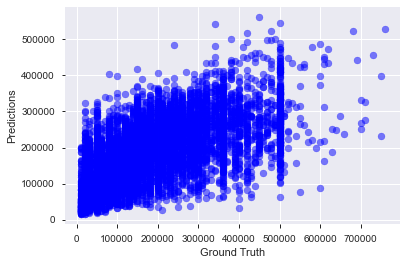

In [31]:
plt.scatter(y_test, predictions, color=['blue'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

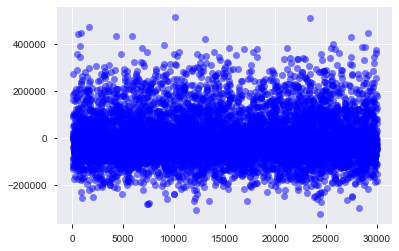

In [32]:
plt.plot(y_test - predictions, marker = 'o', linestyle = ' ', color ='blue', alpha = 0.5)